In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv')

df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


In [7]:
y = df["logS"]
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [13]:
x = df.drop("logS", axis=1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.2, random_state=100)

x_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [16]:
x_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


In [23]:
lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)


y_lr_train_pred[:5]

array([-2.83668969,  0.84208401, -0.50930302, -0.13058053, -1.6269208 ])

In [34]:
y_lr_test_pred[:5]

array([-3.0572287 , -7.77785827, -2.5501665 , -2.01523582, -2.0637599 ])

In [38]:
from sklearn.metrics import mean_squared_error , r2_score

lr_train_msr = mean_squared_error(y_train , y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_msr = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

print('lr_train_msr:', lr_train_msr)
print('lr_train_r2:', lr_train_r2)
print('lr_test_msr:', lr_test_msr)
print('lr_test_r2:', lr_test_r2)


lr_train_msr: 1.0075362951093687
lr_train_r2: 0.7645051774663391
lr_test_msr: 1.0206953660861033
lr_test_r2: 0.7891616188563282


In [56]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_msr, lr_train_r2, lr_test_msr, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'train_msr', 'train_r2', 'test_msr', 'test_r2']
lr_results

,Method,train_msr,train_r2,test_msr,test_r2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


In [45]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [49]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

y_rf_test_pred[:5]

array([-3.97313718, -7.14501987, -2.47178242, -2.40196468, -1.44411435])

In [50]:

rf_train_msr = mean_squared_error(y_train , y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_msr = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

print('rf_train_msr:', rf_train_msr)
print('rf_train_r2:', rf_train_r2)
print('rf_test_msr:', rf_test_msr)
print('rf_test_r2:', rf_test_r2)

rf_train_msr: 1.028227802112806
rf_train_r2: 0.7596688824431413
rf_test_msr: 1.407688264904896
rf_test_r2: 0.7092230211002489


In [57]:
rf_results = pd.DataFrame(['Random Forest', rf_train_msr, rf_train_r2, rf_test_msr, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'train_msr', 'train_r2', 'test_msr', 'test_r2']
rf_results

,Method,train_msr,train_r2,test_msr,test_r2
0,Random Forest,1.028228,0.759669,1.407688,0.709223


In [64]:
df_model = pd.concat([lr_results, rf_results], axis=0).reset_index(drop=True)

df_model

,Method,train_msr,train_r2,test_msr,test_r2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
1,Random Forest,1.028228,0.759669,1.407688,0.709223


[]

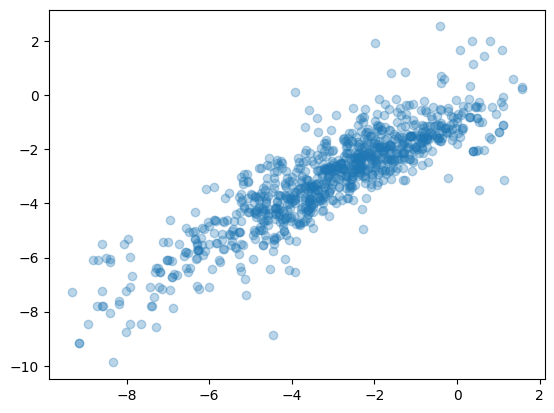

In [73]:
import matplotlib.pyplot as plt
plt.scatter(x=y_train, y=y_lr_train_pred, alpha=0.3)
plt.plot()